In [116]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

In [117]:
df=pd.read_csv("Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [118]:
df.shape

(30, 3)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [120]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [121]:
df=df.drop('Unnamed: 0',axis=1)

In [122]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

<Axes: xlabel='YearsExperience', ylabel='Salary'>

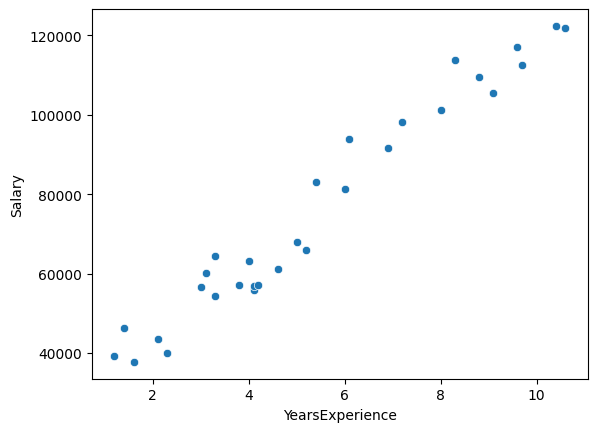

In [123]:
sns.scatterplot(data=df,x=df['YearsExperience'],y=df['Salary'])

In [124]:
X=df[['YearsExperience']]
y=df['Salary']

In [125]:
# split the data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [126]:
y_train.head()

28    122392.0
24    109432.0
12     56958.0
0      39344.0
4      39892.0
Name: Salary, dtype: float64

In [127]:
y_train

28    122392.0
24    109432.0
12     56958.0
0      39344.0
4      39892.0
16     66030.0
5      56643.0
13     57082.0
11     55795.0
22    101303.0
1      46206.0
2      37732.0
25    105583.0
3      43526.0
21     98274.0
26    116970.0
18     81364.0
29    121873.0
20     91739.0
7      54446.0
10     63219.0
14     61112.0
19     93941.0
6      60151.0
Name: Salary, dtype: float64

In [128]:
y_test

27    112636.0
15     67939.0
23    113813.0
17     83089.0
8      64446.0
9      57190.0
Name: Salary, dtype: float64

In [129]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [130]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [131]:
## coefficient and intercepts
print("Coefficient : ",regression.coef_)
print("Intercept : ",regression.intercept_)

Coefficient :  [27151.53742583]
Intercept :  74208.625


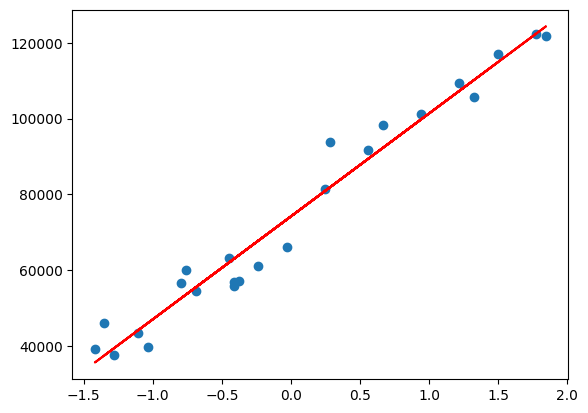

In [132]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),c='red')

In [133]:
y_pred=regression.predict(X_test)
y_pred

array([115791.21011287,  71499.27809463, 102597.86866063,  75268.80422384,
        55478.79204548,  60190.69970699])

In [134]:
print('mean_absolute_error : ',mean_absolute_error(y_test,y_pred))
print('mean_squared_error : ',mean_squared_error(y_test,y_pred))
print('r2_score : ',r2_score(y_test,y_pred))

mean_absolute_error :  6286.453830757742
mean_squared_error :  49830096.85590836
r2_score :  0.9024461774180498
